### <h1> Task 2 <h1> (Поиск максимума из минимумов в строках квадратной матрицы)

In [26]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
data_1 = pd.read_csv('data/matrix_1.csv')
data_2 = pd.read_csv('data/matrix_2.csv')
display(data_1)
display(data_2)

,Num_Threads,Matrix_len,Time
0,1,10,1982
1,2,10,329
2,3,10,277
3,4,10,255
4,5,10,276
...,...,...,...
59,12,10000,163905
60,13,10000,183456
61,14,10000,197321
62,15,10000,193896


,Num_Threads,Matrix_len,Time
0,1,10,169
1,2,10,125
2,3,10,94
3,4,10,81
4,5,10,75
...,...,...,...
59,12,10000,179995
60,13,10000,190653
61,14,10000,193341
62,15,10000,198740


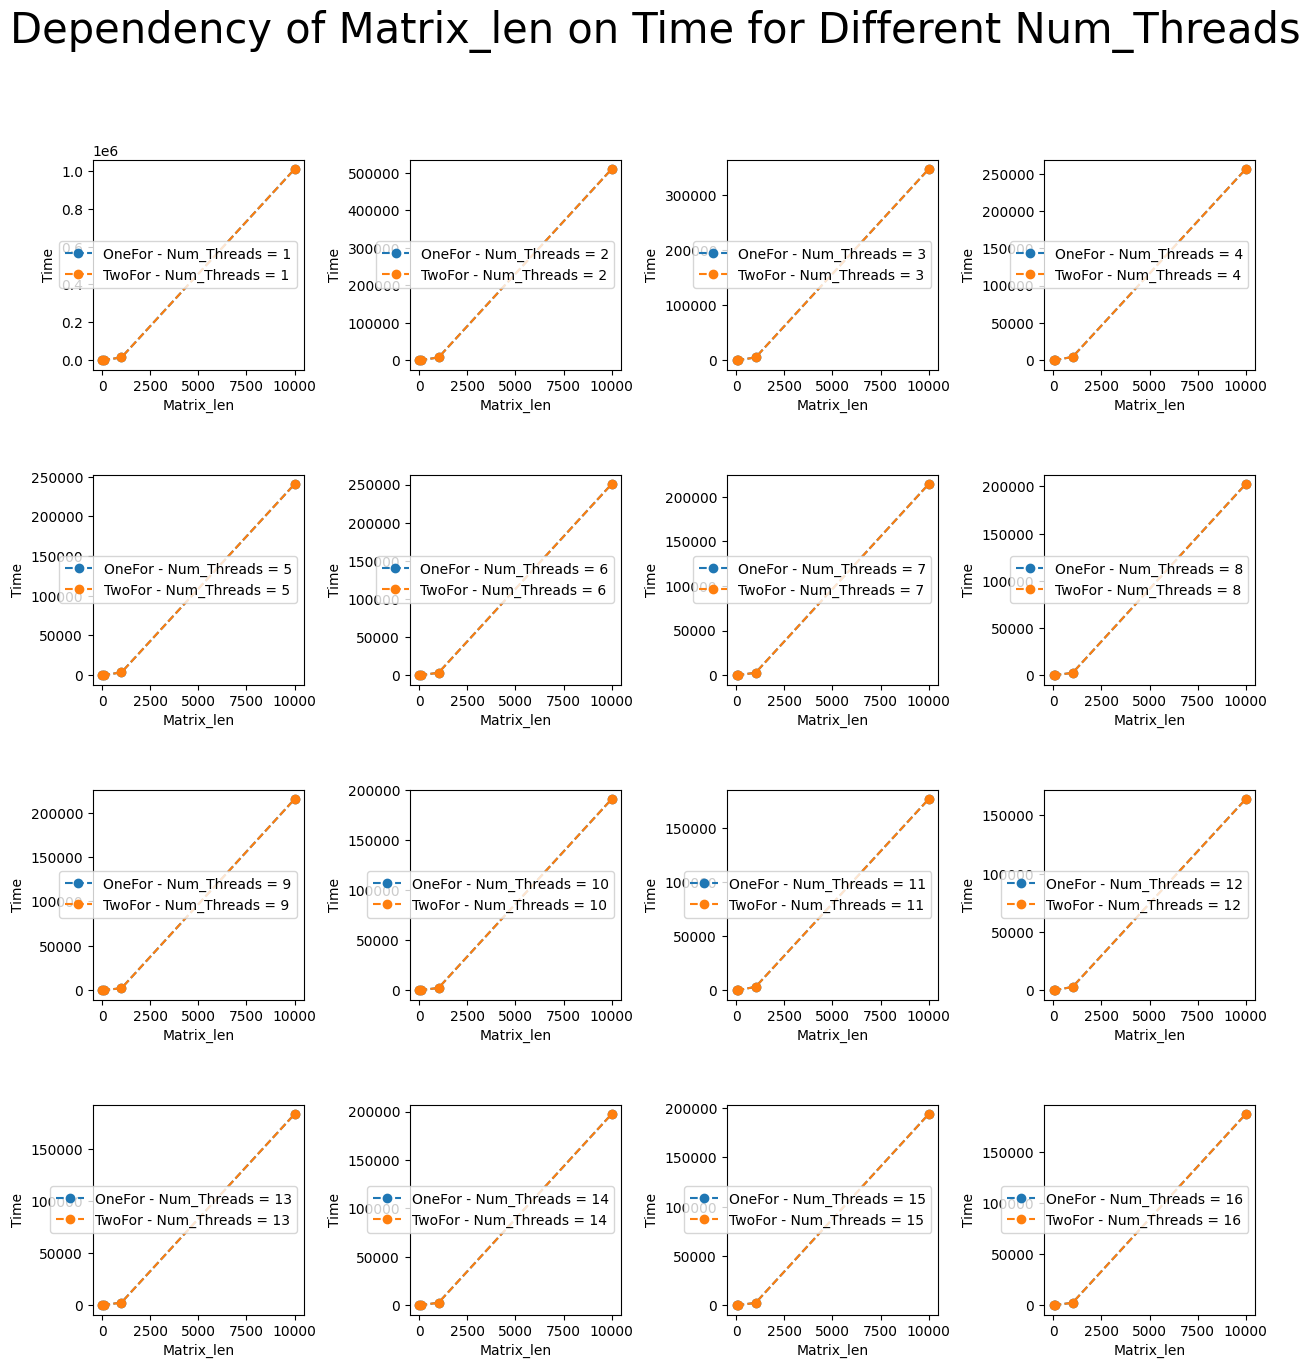

In [28]:
thread_groups_1 = data_1.groupby('Num_Threads')
thread_groups_2 = data_1.groupby('Num_Threads')

thread_groups = [thread_groups_1, thread_groups_2]
labels = ['OneFor', 'TwoFor']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Matrix_len on Time for Different Num_Threads', fontsize=30)

for group, label in zip(thread_groups, labels):
    for thread_count, group_data in group:
        plt.subplot(4, 4, thread_count)
        plt.plot(group_data['Matrix_len'], group_data['Time'], 
                 linestyle='--', marker='o', 
                 label=f'{label} - Num_Threads = {thread_count}')

        plt.xlabel('Matrix_len')
        plt.ylabel('Time')
        plt.legend()

plt.show()

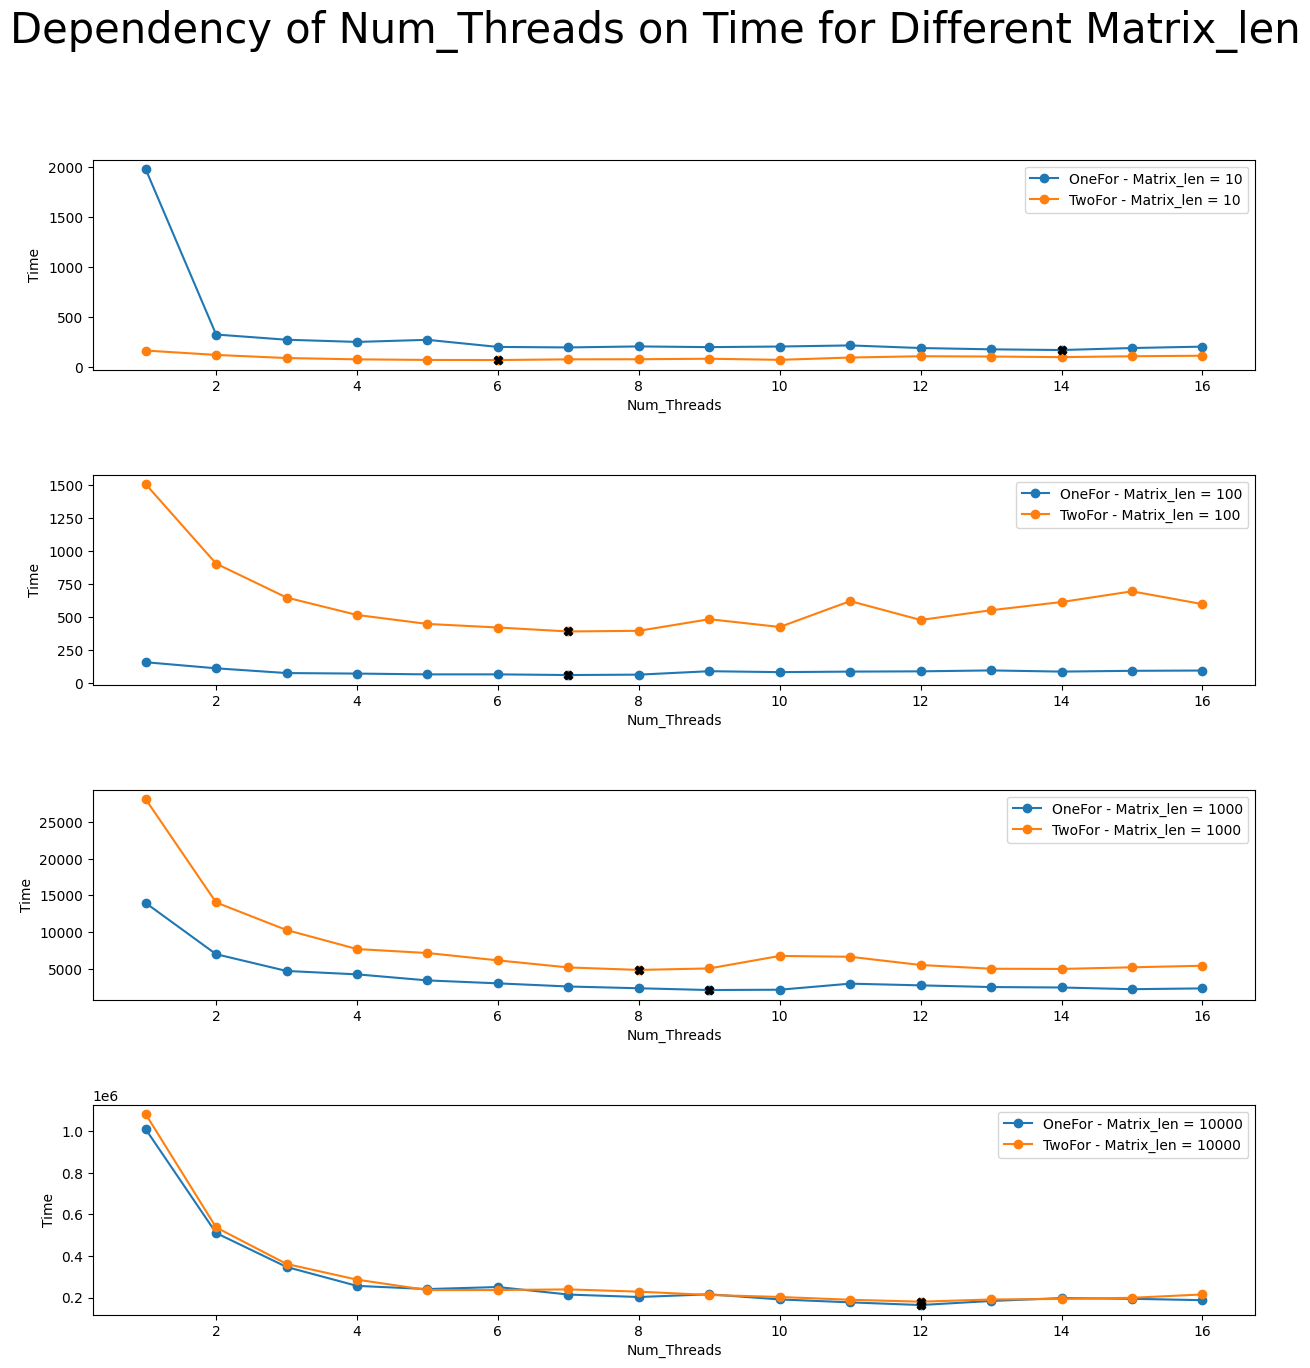

In [29]:
iter_groups_1 = data_1.groupby('Matrix_len', as_index=False)
iter_groups_2 = data_2.groupby('Matrix_len', as_index=False)

iter_groups = [iter_groups_1, iter_groups_2]
labels = ['OneFor', 'TwoFor']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Num_Threads on Time for Different Matrix_len', fontsize=30)

for group, label in zip(iter_groups, labels):
    for k, (iter_value, group_data) in enumerate(group, 1):
        group_data = group_data.reset_index()
        
        plt.subplot(len(group), 1, k)
        plt.plot(group_data['Num_Threads'], group_data['Time'], 
                 marker='o', linestyle='-', 
                 label=f'{label} - Matrix_len = {iter_value}')
        
        # Выделение точки с наименьшим значением красным цветом
        min_time_idx = group_data['Time'].idxmin()
        plt.scatter(group_data['Num_Threads'].iloc[min_time_idx], group_data['Time'].iloc[min_time_idx], color='black', marker='X', zorder=10)
        plt.xlabel('Num_Threads')
        plt.ylabel('Time')
        plt.legend()

plt.show()

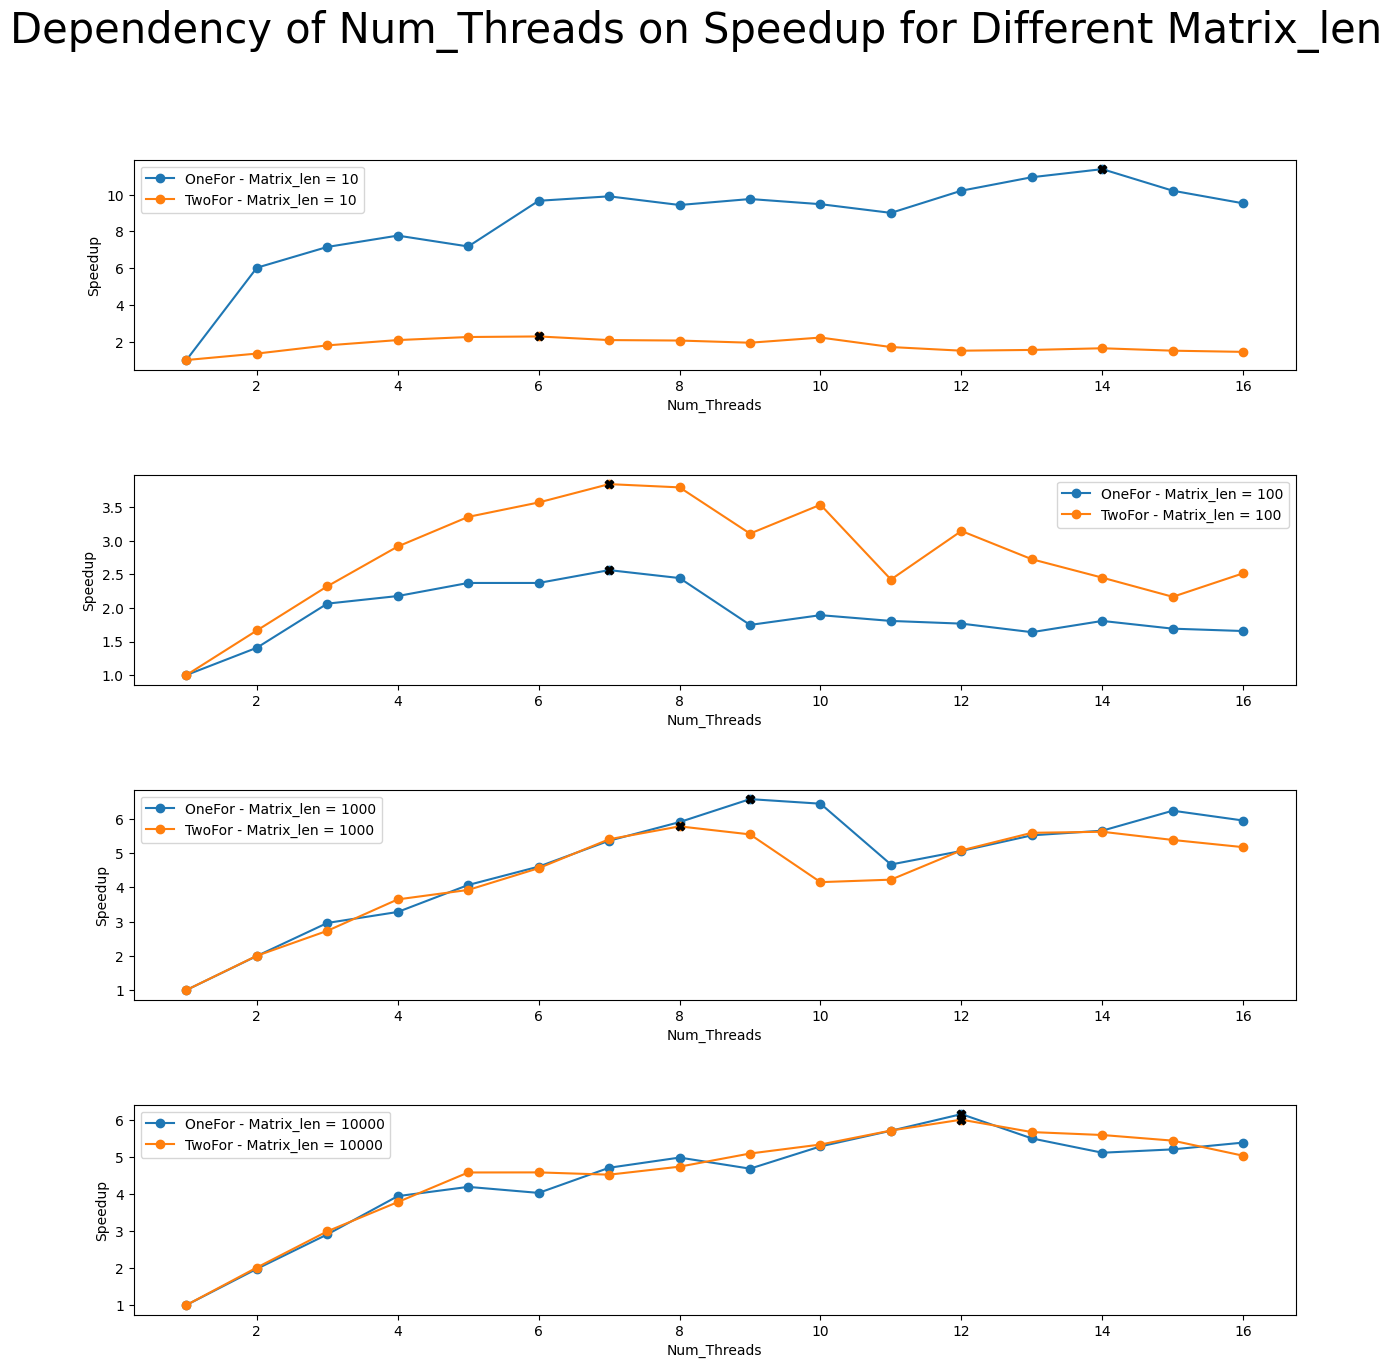

In [30]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Num_Threads on Speedup for Different Matrix_len', fontsize=30)

base_num_threads = 1  # Базовое количество потоков для расчета ускорения

for group, label in zip(iter_groups, labels):
    for k, (iter_value, group_data) in enumerate(group, 1):
        group_data = group_data.reset_index()
        
        base_time = group_data[group_data['Num_Threads'] == base_num_threads]['Time'].values[0]
        speedup = base_time / group_data['Time']
        
        plt.subplot(len(group), 1, k)
        plt.plot(group_data['Num_Threads'], speedup, 
                 marker='o', linestyle='-', 
                 label=f'{label} - Matrix_len = {iter_value}')
        
        # Выделение точки с наибольшим значением ускорения красным цветом
        max_speedup_idx = np.argmax(speedup)
        plt.scatter(group_data['Num_Threads'].iloc[max_speedup_idx], speedup.iloc[max_speedup_idx], color='black', marker='X', zorder=10)
        
        plt.xlabel('Num_Threads')
        plt.ylabel('Speedup')
        plt.legend()

plt.show()

# Вывод:
Из представленных графиков можно сделать вывод, что двойной уровень вложенности распараллеливания цикла не даёт как существенного прироста, так и замедления для данной задачи.
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 